In [2]:
cd ..

/Users/deepakduggirala/Documents/autonomous-robotics/translating-images-into-maps


In [3]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120

In [4]:
import numpy as np

import matplotlib.pyplot as plt

from pathlib import Path

import pandas as pd

28000 - trianing 
6000 - validation

In [5]:
def read_ious(fname, token):
    with open(fname) as f:
        val_iou = [l for l in f.read().split('\n') if l]
    iou_epochs = [''.join(l)[len(token)+1:-3].split() for l in val_iou if l.startswith(token)]
    ious = np.array([[float(iou) for iou in iou_epoch] for iou_epoch in iou_epochs])
    return ious

def plot_ious(train_ious, val_ious, val_interval, figsize=(10,10)):
    train_epochs = np.arange(1, train_ious.shape[0]+1)
    val_epochs = val_interval*np.arange(1, val_ious.shape[0]+1)
    
    n_cols, n_rows=4, 4
    fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=figsize)

    for row in range(n_rows):
        for col in range(n_cols):
            i = row*n_cols + col
            if i < len(classes_pred):
                ax = axs[row][col]
                ax.plot(train_epochs, train_ious[:,i], label='train')
                ax.plot(val_epochs, val_ious[:,i], label='val')
                ax.set_title(classes_pred[i])
                # ax.legend()
                # ax.set_xlabel('num epochs')
                # ax.set_ylabel('IOU')
            
    # access each axes object via axs.flat
    for ax in axs.flat:
        # check if something was plotted
        if not bool(ax.has_data()):
            fig.delaxes(ax)  # delete if nothing is plotted in the axes obj

    

    fig.tight_layout()
    
    # Set common labels
    fig.text(0.5, 0.01, 'num epochs', ha='center', va='center')
    fig.text(0.01, 0.5, 'IOU', ha='center', va='center', rotation='vertical')
    fig.savefig('iou.png', dpi=300)
    
def read_loss(fname):
    with open(fname) as f:
        loss_txt = [l for l in f.read().split() if l]

    return np.array([[float(el) for el in l.split(',')[1:] if el] for l in loss_txt])

def plot_loss(train_loss, val_loss, val_interval):
    train_epochs = np.arange(1, train_loss.shape[0]+1)
    val_epochs = val_interval*np.arange(1, val_loss.shape[0]+1)
    plt.plot(train_epochs, train_loss[:,0], label='train')
    plt.plot(val_epochs, val_loss[:,0], label='val')
    plt.title('loss')
    plt.legend()
    plt.xlabel('num epochs')
    plt.ylabel('loss')
    plt.savefig('loss.png', dpi=300)

In [6]:
classes_pred=[
            "drivable_area",
            "ped_crossing",
            "walkway",
            "carpark_area",
            "bus",
            "bicycle",
            "car",
            "construction_vehicle",
            "motorcycle",
            "trailer",
            "truck",
            "pedestrian",
            "trafficcone",
            "barrier",
        ]
len(classes_pred)

14

## Experiment - 4
- Folder Name: tiim_full
- job id: 3159614

Params:
- trainset size - 5600 (data_size=0.2)
- batch_size - 8
- lr - 5e-5
- update after each batch (accumulation-steps=1)
- epochs - 10

Outcome:
- 700 mini-batches, 
- each mini-batch took 3.4 seconds
- time for 1 epoch - 45 min
- total run time: 7h30m
- Loss started with 3.78 ended at 2.5 (epoch=10)

- job id: 3159703 - epochs 11-20
- job id: 3160018 - epochs 21-40 (13h 40 m

In [28]:
val_interval = 5
dir_name = Path('experiments/tiim_full-exp4')


fname = dir_name / 'val_ious.txt'
val_s200_ious_per_class = read_ious(fname, 's200_ious_per_class: ')
val_s100_ious_per_class = read_ious(fname, 's100_ious_per_class: ')

fname = dir_name / 'train_ious.txt'
train_s100_ious_per_class = read_ious(fname, 's100_ious_per_class: ')

val_loss = read_loss(dir_name / 'val_loss.txt')
train_loss = read_loss(dir_name / 'train_loss.txt')

In [ ]:
plot_ious(train_s100_ious_per_class, val_s100_ious_per_class, val_interval)

In [ ]:
plot_loss(train_loss, val_loss, val_interval)

## Experiment-5

- Folder Name: tiim_full_b8_e10_pin
- job id: 3159621
- start time: 2022-12-02 21:41:35
- end time: 

Params:
- trainset size - 7000 (data_size=0.25)
- batch_size - 8
- lr - 1.25e-5
- update after each batch (accumulation-steps=1)
- epochs - 10
- added pin_memory=True to torch dataloaders

Outcome:
- 875 mini-batches, 
- each mini-batch took 3.25 seconds
- time for 1 epoch - 45 min
- total run time: 9h30m
- Loss started with 3.78 and ended at 2.25 (epoch=10)

- job id: 3159771 - epochs 11-20
- job id: 3160409 - epochs 21-40

In [43]:
val_interval = 5
dir_name = Path('experiments/tiim_full_b8_e10_pin-exp5')


fname = dir_name / 'val_ious.txt'
val_s200_ious_per_class = read_ious(fname, 's200_ious_per_class: ')
val_s100_ious_per_class = read_ious(fname, 's100_ious_per_class: ')

fname = dir_name / 'train_ious.txt'
train_s100_ious_per_class = read_ious(fname, 's100_ious_per_class: ')

val_loss = read_loss(dir_name / 'val_loss.txt')
train_loss = read_loss(dir_name / 'train_loss.txt')

In [ ]:
plot_ious(train_s100_ious_per_class, val_s100_ious_per_class, val_interval)

In [ ]:
plot_loss(train_loss, val_loss, val_interval)

## Experiment - 6

- Folder Name: tiim_28k
- job id: 3160691
- start time: 2022-12-04 06:38
- end time: 2022-12-05 20:17 (epoch-10) (1 day 13 hours)

Params:
- trainset size - 28000 (data_size=1)
- batch_size - 8
- lr - 5e-5
- update after each batch (accumulation-steps=1)
- epochs - 10
- added pin_memory=True to torch dataloaders

Outcome:
- 3500 mini-batches, 
- each mini-batch took 3.5 seconds
- time for 1 epoch - 3h30 min
- total run time: 
- Loss started with 3.76

- job id: 3169297 - epochs 11-20
- job id: 3160409 - epochs 21-30


In [13]:
val_interval = 1
dir_name = Path('experiments/tiim_28k-exp6')


fname = dir_name / 'val_ious.txt'
val_s200_ious_per_class = read_ious(fname, 's200_ious_per_class: ')
val_s100_ious_per_class = read_ious(fname, 's100_ious_per_class: ')

fname = dir_name / 'train_ious.txt'
train_s100_ious_per_class = read_ious(fname, 's100_ious_per_class: ')

val_loss = read_loss(dir_name / 'val_loss.txt')
train_loss = read_loss(dir_name / 'train_loss.txt')

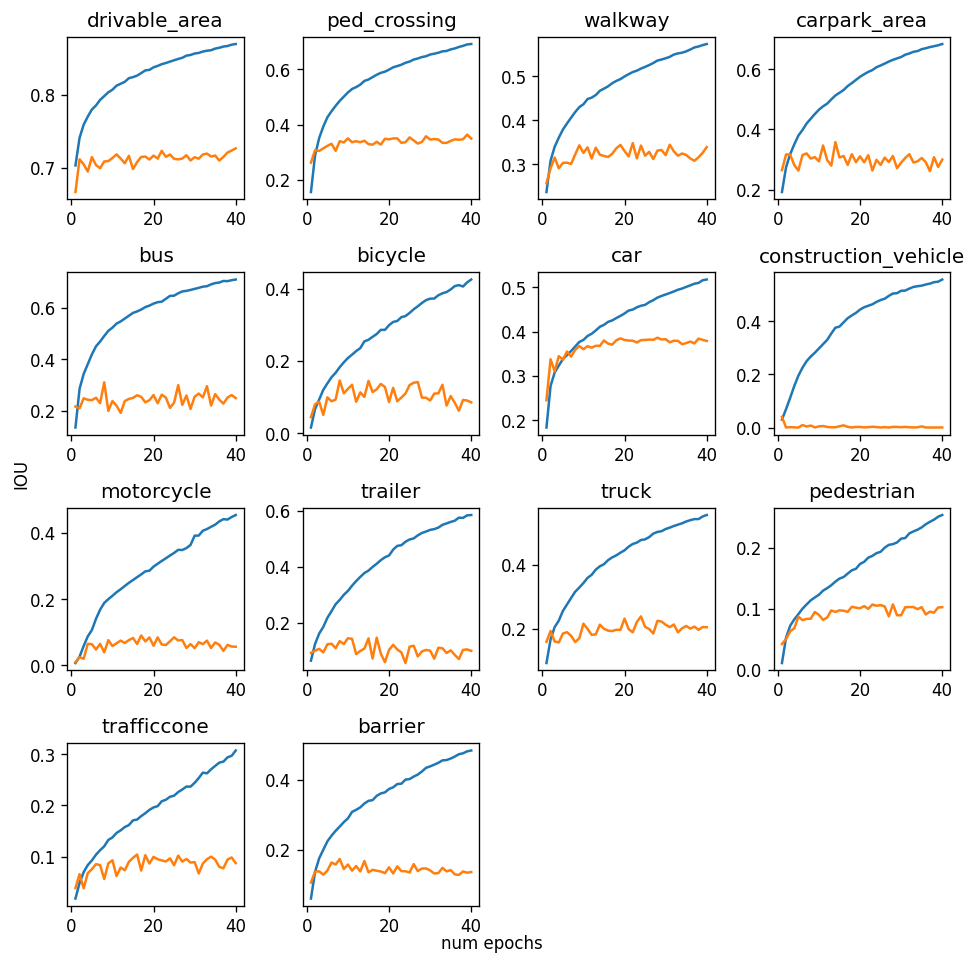

In [8]:
plot_ious(train_s100_ious_per_class, val_s100_ious_per_class, val_interval, figsize=(8,8))

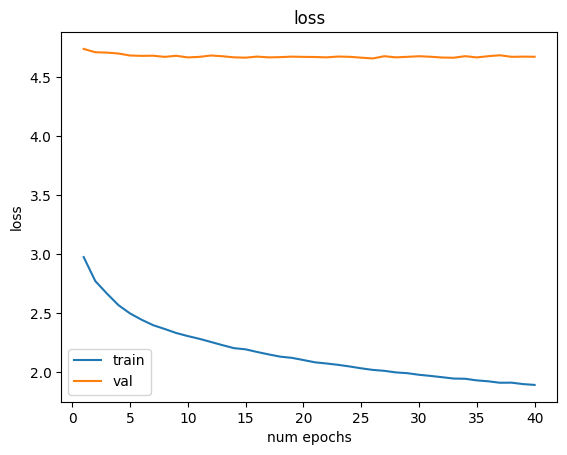

In [26]:
plot_loss(train_loss, val_loss, val_interval)

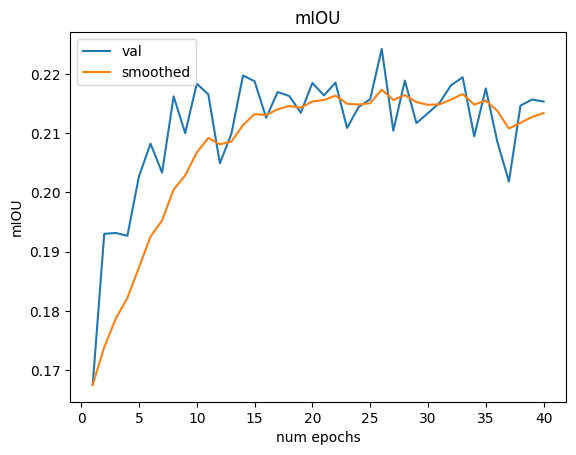

In [107]:
def plot_mIOU(val_iou, val_interval):
    mIOU = val_iou.mean(axis=1)
    train_epochs = np.arange(1, train_loss.shape[0]+1)
    val_epochs = val_interval*np.arange(1, val_loss.shape[0]+1)
    plt.plot(val_epochs, mIOU, label='val')
    plt.plot(val_epochs, smooth(mIOU, 0.75), label='smoothed')
    plt.title('mIOU')
    plt.legend()
    plt.xlabel('num epochs')
    plt.ylabel('mIOU')
    plt.savefig('mIOU.png', dpi=300)
plot_mIOU(val_s200_ious_per_class, val_interval)

In [36]:
np.round(val_loss[[0,4,9,14,19,24,29,34,39],0], 3)

array([4.738, 4.682, 4.666, 4.664, 4.67 , 4.664, 4.676, 4.666, 4.671])

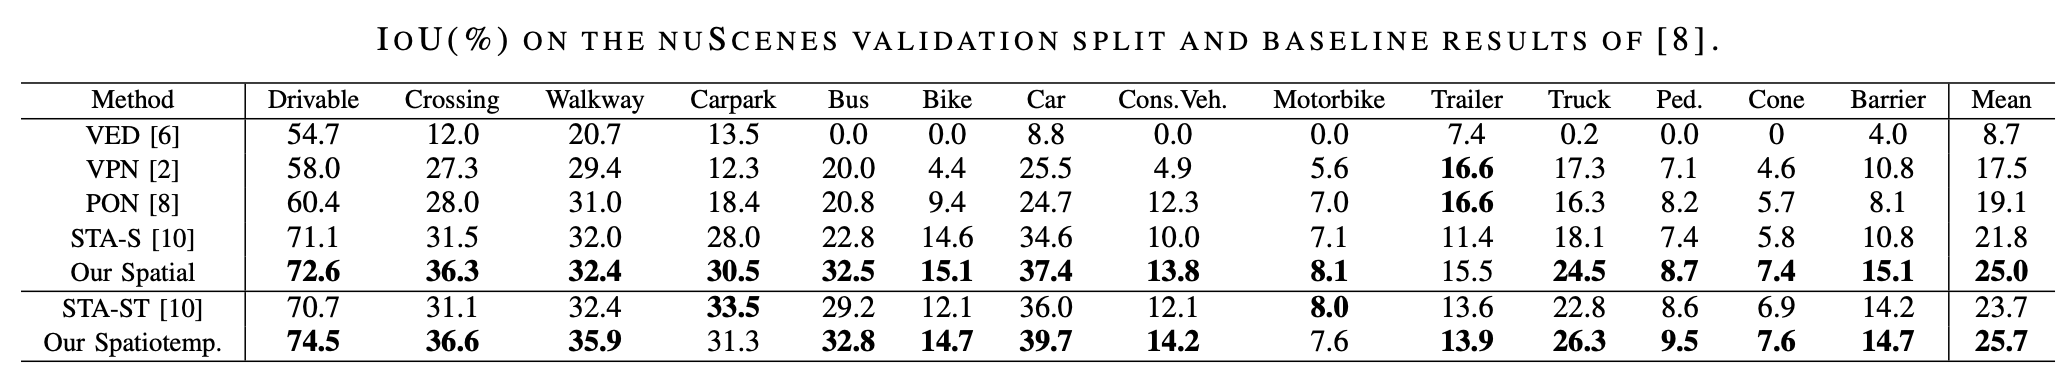

In [15]:
np.mean(val_s200_ious_per_class[[25,-1]], axis=1)

array([0.2242181 , 0.21534216])

In [18]:
df_train = pd.DataFrame(np.round(100*train_s100_ious_per_class[[25,-1],:], 1).T, index=classes_pred, columns=['train-26', 'train-40'])
df_val = pd.DataFrame(np.round(100*val_s100_ious_per_class[[25,-1],:], 1).T, index=classes_pred, columns=['val-26', 'val-40'])

df = pd.concat([df_train, df_val], axis=1)
df.T.to_csv('best_iou.csv')
df

,train-26,train-40,val-26,val-40
drivable_area,84.9,87.0,71.1,72.7
ped_crossing,63.6,69.2,34.2,34.9
walkway,52.5,57.3,32.8,33.9
carpark_area,61.9,68.4,30.7,30.0
bus,65.6,71.0,29.9,24.8
bicycle,34.3,42.6,14.0,8.6
car,46.6,51.8,38.2,37.9
construction_vehicle,48.5,55.7,0.2,0.0
motorcycle,34.9,45.4,7.5,5.7
trailer,50.2,58.6,11.7,9.8


In [40]:
np.argmin(val_loss[:,0])

25

In [46]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

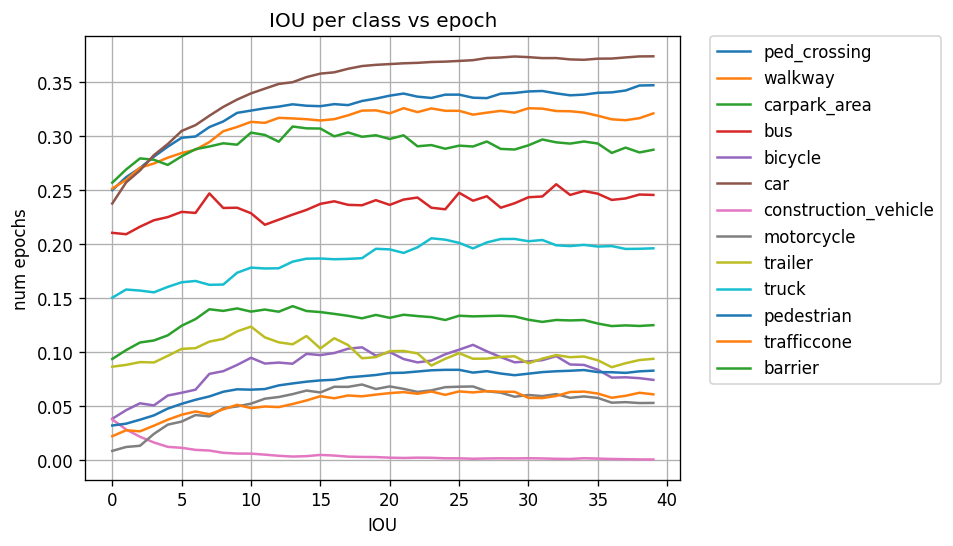

In [114]:
for i in range(1,len(classes_pred)):
    plt.plot(smooth(val_s200_ious_per_class[:,i], 0.75), label=classes_pred[i])
plt.title('IOU per class vs epoch')
plt.xlabel('IOU')
plt.ylabel('num epochs')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('iou_per_class.png', dpi=300, bbox_inches='tight')